# 🚇Объем межгосударственного трафика метрополитена
## 🚇Metro Interstate Traffic Volume

## 📝Содержание

Почасовой объем трафика Миннеаполис-Сент-Пол, Миннесота на западном направлении I-94. Включает информацию о погоде и отдыхе за 2012–2018 годы.

## 📥Источник

https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

## 🎯Цель работы

- Исследовать и проанализировать данные
- Просмотреть распределение данных
- Провести обучение моделей
- Сделать выводы

# 1. 📖Подключение базовых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. 📥Загрузка данных

In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.sample(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
29434,NaN,274.28,0.0,0.0,90,Mist,mist,2016-12-24 17:00:00,3331
11204,NaN,269.63,0.0,0.0,64,Clouds,broken clouds,2014-01-03 22:00:00,1782
41596,NaN,268.68,0.0,0.0,90,Clouds,overcast clouds,2018-02-18 09:00:00,2567
36897,NaN,296.22,0.0,0.0,40,Clouds,scattered clouds,2017-09-04 15:00:00,4347
12850,NaN,273.55,0.0,0.0,20,Clouds,few clouds,2014-03-11 22:00:00,3751


## Описание данных
- holiday - национальные праздники США и региональный праздник, Ярмарка штата Миннесота
- temp - Средняя температура в Кельвинах
- rain_1h - Количество осадков в мм, выпавших за час
- snow_1h - Количество снега в мм, выпавшее за час
- clouds_all - Процент облачности
- weather_main - Краткое текстовое описание текущей погоды
- weather_description - Более подробное текстовое описание текущей погоды.
- date_time - Час сбора данных по местному времени CST.
- traffic_volume - Ежечасно I-94 ATR 301 сообщал об объеме движения в западном направлении.

# 2.1 🔎Первичный анализ данных

In [3]:
# Посмотрим на размерность дата-сета
df.shape

(48204, 9)

In [4]:
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

Видим типы данных признаков из них:
- object (4)
- float64 (3)
- int64 (2)

In [1]:
df.info()

NameError: name 'df' is not defined

Заметим очень много пропущенных значений в признаке holiday, надо что-то с этим сделать

In [6]:
df['holiday'] = df['holiday'].fillna('None')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Теперь все хорошо.

In [8]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [9]:
df.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


Из вышеуказанного делаем выводы:
- Минимальная температура: 0 градусов по Кельвину
- Максимальна температура: 310 градусов по Кельвину
- Средняя температура: 281 градусов по Кельвину
- Максимальное кол-во осадков дождя: 9831 (очень похоже на аномалию, позже рассмотрим подробнее)
- Минимальное кол-во осадков дождя: 0
- Максимальное кол-во осадков снега: 0.51
- Минимальное кол-во осадков снега: 0
- Максимальный процент облачности: 100%
- Минимальный процент облачности: 0%
- Максимальный объем движения: 7280 человек
- Минимальный объем движения: 0 человек
- Больше всего данных собрали 19 мая 2013 года

In [10]:
# Поиск дубликатов
df.duplicated().sum()

17

Видим наличие дубликатов, посмотрим, точно ли это дубликаты

In [11]:
df[df.duplicated()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18697,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23851,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26784,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26980,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27171,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28879,None,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,4520
29268,None,254.220,0.0,0.0,1,Clear,sky is clear,2016-12-19 00:00:00,420
34711,None,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34967,None,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34969,None,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,4725


In [12]:
df[df.duplicated(keep='last')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18696,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23850,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26783,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26979,None,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27170,None,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28878,None,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,4520
29267,None,254.220,0.0,0.0,1,Clear,sky is clear,2016-12-19 00:00:00,420
34710,None,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34966,None,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34968,None,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,4725


Убедились, что это точно дубликаты, удалим

In [13]:
# Удалим дубликаты
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape

(48187, 9)

Размерность дата-сета из (48204, 9) преобразовалась в (48187, 9)

In [14]:
df[df['rain_1h'] == df['rain_1h'].max()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24870,None,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


Видим, что в целом день, который может иметь такое кол-во осадков, имеет место существовать, эта строка не подлежит удалению

In [15]:
df['weather_main'].value_counts()

weather_main
Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

В большинстве дней было облачно

In [16]:
df['holiday'].value_counts()

holiday
None                         48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

Здесь заметно, что больше всего дней были без праздников, это вполне логично.

In [17]:
df[df['holiday'] == 'Labor Day']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8742,Labor Day,288.78,0.00,0.0,0,Clear,Sky is Clear,2013-09-02 00:00:00,1041
18041,Labor Day,295.02,0.00,0.0,90,Clouds,overcast clouds,2015-09-07 00:00:00,973
26317,Labor Day,293.17,1.52,0.0,90,Rain,moderate rain,2016-09-05 00:00:00,1064
26318,Labor Day,293.17,1.52,0.0,90,Thunderstorm,proximity thunderstorm,2016-09-05 00:00:00,1064
36870,Labor Day,295.54,0.00,0.0,1,Clear,sky is clear,2017-09-04 00:00:00,1026
47314,Labor Day,292.43,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962
47315,Labor Day,292.43,0.25,0.0,1,Mist,mist,2018-09-03 00:00:00,962


В этих записях заметно, что некоторые даты повторяются, меняется только погода, такое может быть.

*чтобы вывести график без строки "<Axes: xlabel='count', ylabel='weather_main'>" поставь ";" в конце строки кода*

<Axes: xlabel='count', ylabel='weather_main'>

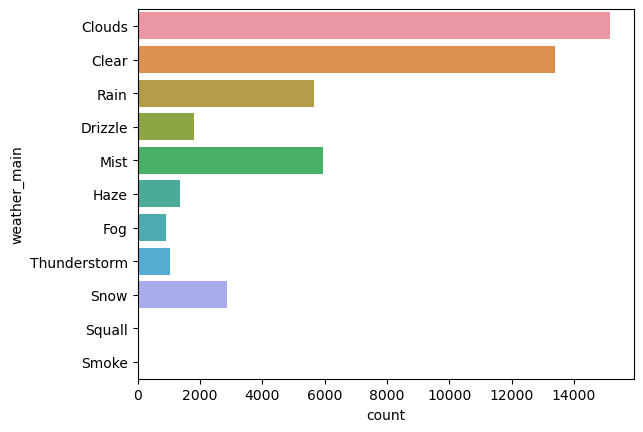

In [18]:
# изучим различные категории в признаке Weather_main
sns.countplot(y='weather_main', data=df)

In [19]:
df['date_time'] = df['date_time'].astype('datetime64[ns]')

In [20]:
# Разделяем дату по разным столбцам
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['day_of_week'] = df['date_time'].dt.dayofweek
df['hour'] = df['date_time'].dt.hour
df = df.drop(['date_time'], axis=1)
df.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,day_of_week,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,1,11


In [21]:
df_dummies = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'], dtype=int)

In [22]:
df_dummies.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'year',
       'month', 'day', 'day_of_week', 'hour', 'holiday_Christmas Day',
       'holiday_Columbus Day', 'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_None', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
       'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
       'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall',
       'weather_main_Thunderstorm', 'weather_description_SQUALLS',
       'weather_description_Sky is Clear', 'weather_description_broken clouds',
       'weather_description_drizzle', 'weather_description_few clouds',
       'weather_description_fog', 'weather_description_freezing rain',
       

*вместо столбцов покажи лучше сам датасет. если есть необходимость вывести все столбцы набора данных, то используй строку:*

`pd.set_option('display.max_columns', None)`

# 2.2 📊Просмотр распределения данных

In [23]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

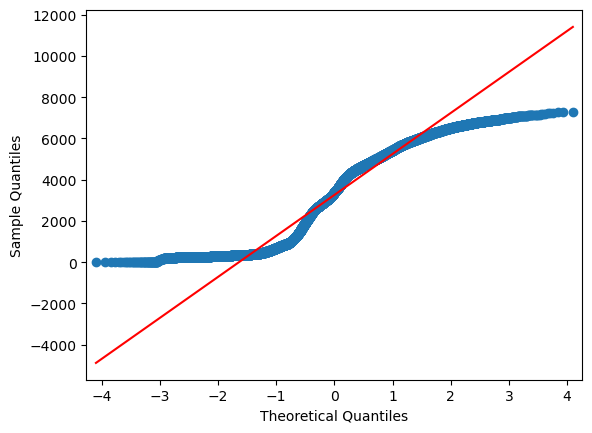

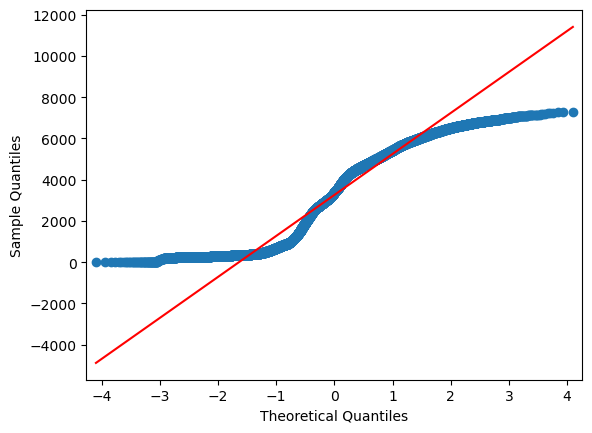

In [24]:
qqplot(df.traffic_volume, line='s')

На этом графике заметно отсутствие нормального распределения.

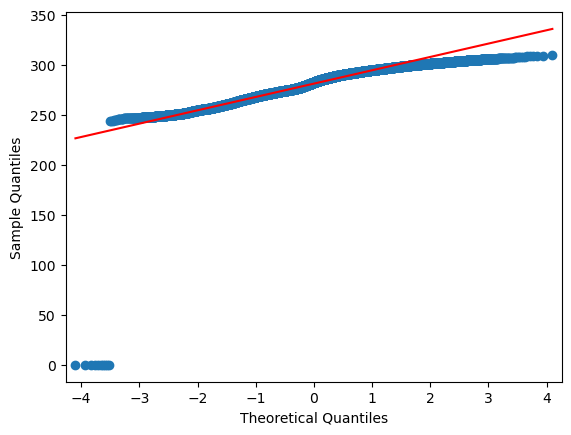

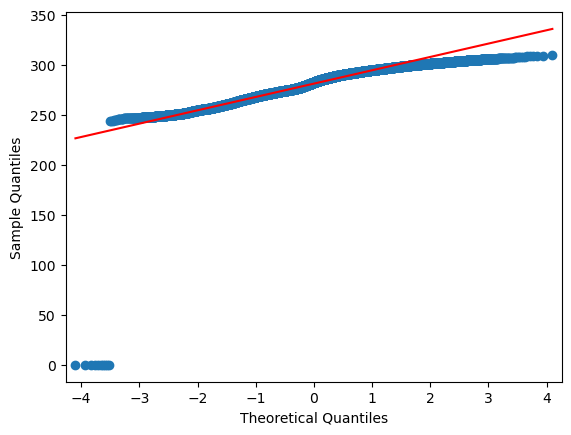

In [25]:
qqplot(df.temp, line='s')

Здесь наблюдаем что нормального распределения также нет.

*если используешь нестандартные способы для определения каких-то характеристик, то добавляй краткое описание этих методов (как работают и что определяют, какая интерпритация результатов ). +100 аура к оценке отчёта.*

In [26]:
# Тест Шапиро-Уилка
from scipy.stats import shapiro
from scipy.stats import normaltest
shapiro_result = shapiro(df.temp)
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_result.statistic}, p-value: {shapiro_result.pvalue}")

Shapiro-Wilk Test:
Statistic: 0.9112788438796997, p-value: 0.0


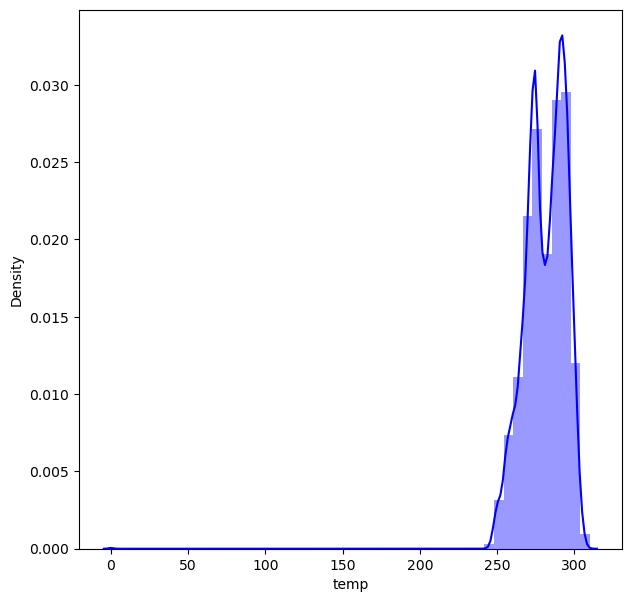

In [27]:
fig = plt.figure
fig,ax= plt.subplots(figsize=(7,7))
sns.distplot(df.temp,color='blue',label='bmi',ax=ax)
plt.show()

На данном графике видно, что нормальное распределение данных отсутсвует, есть множество нулевых значений, которые этому мешают.

*здесь тоже описания метода не хватает*

In [28]:
# Тест Д’Агостино и тест Омстеда
normaltest_result = normaltest(df.temp)
print("\nNormality Test (D’Agostino and Pearson):")
print(f"Statistic: {normaltest_result.statistic}, p-value: {normaltest_result.pvalue}")


Normality Test (D’Agostino and Pearson):
Statistic: 31107.195161202813, p-value: 0.0


In [29]:
df.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,day_of_week,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,1,13
5,None,291.72,0.0,0.0,1,Clear,sky is clear,5181,2012,10,2,1,14
6,None,293.17,0.0,0.0,1,Clear,sky is clear,5584,2012,10,2,1,15
7,None,293.86,0.0,0.0,1,Clear,sky is clear,6015,2012,10,2,1,16
8,None,294.14,0.0,0.0,20,Clouds,few clouds,5791,2012,10,2,1,17
9,None,293.10,0.0,0.0,20,Clouds,few clouds,4770,2012,10,2,1,18


Подготовили датасет, теперь приступаем к обучению!

# 3. Кластеризация

In [30]:
X = df_dummies

*не забывай писать комментарии с пояснением кода*

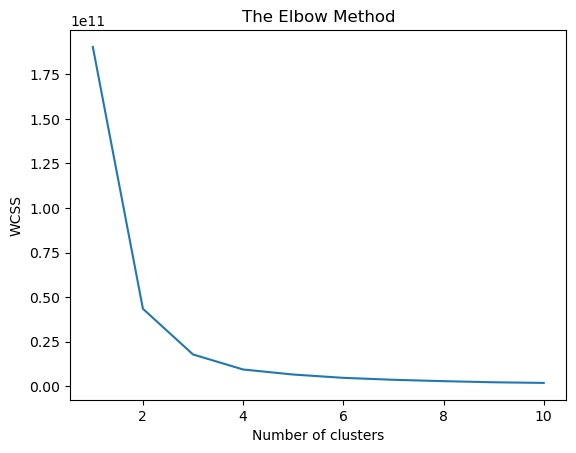

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

По методу локтя видим что скорее всего самым оптимальным окажется значение 2 или 3

In [32]:
# Посмотрим с какими параметрами какое значчение кластеризации будет выдавать
from sklearn import metrics
values = np.arange(2, 10)
scores = []
for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.6494801653761584

Number of clusters = 3
Silhouette score = 0.6383284700860283

Number of clusters = 4
Silhouette score = 0.6237481730605666

Number of clusters = 5
Silhouette score = 0.5923856714015263

Number of clusters = 6
Silhouette score = 0.5701681490693603

Number of clusters = 7
Silhouette score = 0.555352650051823

Number of clusters = 8
Silhouette score = 0.5404707115680633

Number of clusters = 9
Silhouette score = 0.5386902664252673



Optimal number of clusters = 2


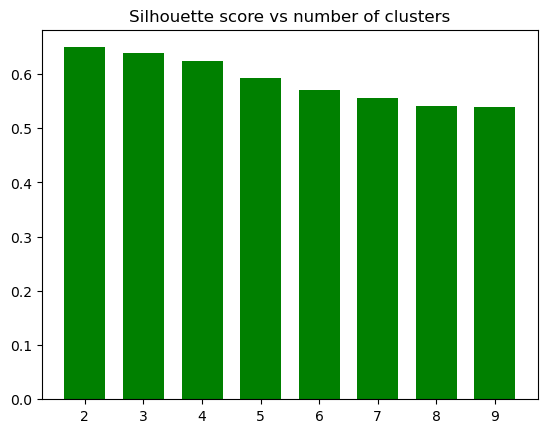

In [33]:
# Графическое представление
plt.figure()
plt.bar(values, scores, width=0.7, color='green', align='center')
plt.title('Silhouette score vs number of clusters')
 
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

Лучшее значение показало значение 2

In [34]:
# Удаляю аномальные значения, тк они плохо влияют на кластеризацию
df_dummies = df_dummies[df_dummies['temp'] >= 10]

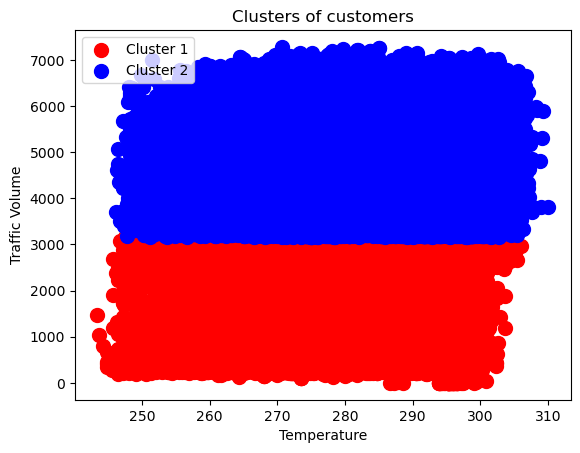

In [35]:
# Применим и графически сразу увидим результат

X = df_dummies[['temp', 'traffic_volume']].values

num_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
pred = kmeans.fit_predict(X)

plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s=100, c='blue', label='Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Оценка кластеризации

In [36]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

163620.7310992735

In [37]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.46848645450051096

In [38]:
# С этим аккуратно

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

KeyboardInterrupt: 

*не хватает описания итоговой дендрограммы. можно, например, написать так:*

Каждая горизонтальная линия представляет собой объединение двух кластеров. Чем выше линия, тем более различными были эти кластеры. [Вывод]

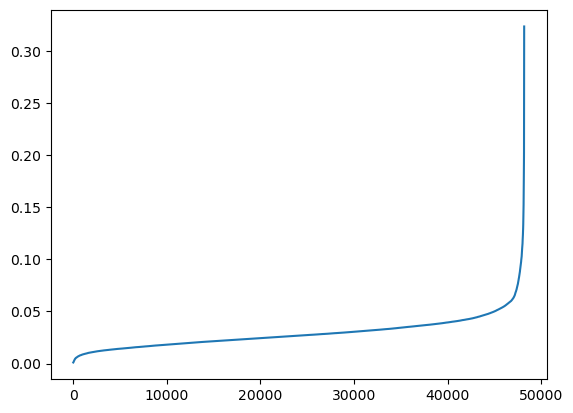

In [39]:
# DBScan
X = (X - X.mean(axis=0))/X.std(axis=0)
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)
dist = dist[:, -1]
dist = np.sort(dist)
plt.plot(dist)

In [40]:
eps = 0.2
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)
labels = dbscan.labels_

In [41]:
pd.Series(labels).value_counts()

 0    48176
-1        1
Name: count, dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

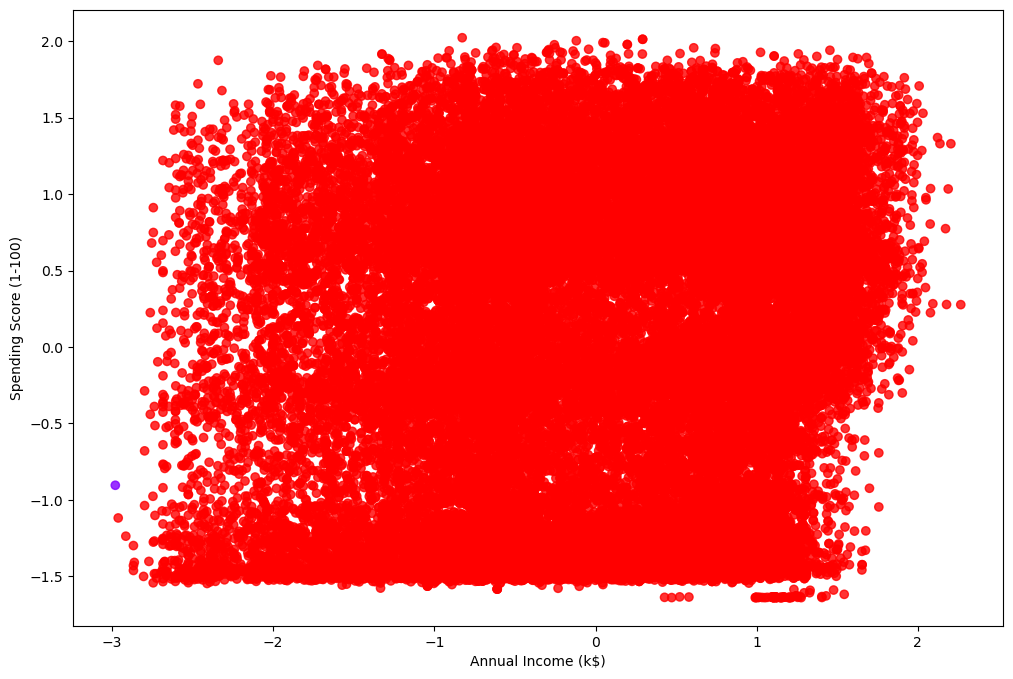

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [43]:
print(metrics.silhouette_score(X, labels))
print(metrics.calinski_harabasz_score(X, labels))
print(metrics.davies_bouldin_score(X, kmeans.labels_))

0.3904108741251594
4.849665714168544
1.117757809601101


*перед выводом каждой метрики добавь подпись, что она значит*

# 4. 🤖Обучение моделей

In [44]:
# Импортируем нужные библиотеки

# инструмент для поиска лучших гиперпараметров
from sklearn.model_selection import GridSearchCV

#импортируем модели для их обучения
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dct = {}

In [45]:
X = df_dummies.drop(['traffic_volume'], axis=1)
y = df_dummies['traffic_volume']

In [46]:
num_clusters = 5

*почему кластеров 5?*

In [47]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [48]:
pred=kmeans.fit_predict(X)
pred

array([4, 0, 0, ..., 0, 0, 0])

In [49]:
labels=kmeans.labels_
print(labels)

[4 0 0 ... 0 0 0]


In [50]:
df_dummies['cluster'] = pd.Series(labels)

In [51]:
df_dummies.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,day_of_week,hour,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,cluster
0,288.28,0.0,0.0,40,5545,2012,10,2,1,9,...,0,0,0,0,0,0,0,0,0,4.0
1,289.36,0.0,0.0,75,4516,2012,10,2,1,10,...,0,0,0,0,0,0,0,0,0,0.0
2,289.58,0.0,0.0,90,4767,2012,10,2,1,11,...,0,0,0,0,0,0,0,0,0,0.0
3,290.13,0.0,0.0,90,5026,2012,10,2,1,12,...,0,0,0,0,0,0,0,0,0,0.0
4,291.14,0.0,0.0,75,4918,2012,10,2,1,13,...,0,0,0,0,0,0,0,0,0,0.0


*если в задаче есть обучение модели кластеризации, то нужно обучить как минимум 3 модели. из них выбрать лучшую и выполнить небольшой анализ получившихся кластеров (например, вывод количества каждого уникального значения кластера, можно просто текст, а можно график).*

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*комментарий!*

## 👾GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)

In [54]:
print('R2 Score', r2_score(y_test, boost_pred))
dct['GradientBoosting'] = r2_score(y_test, boost_pred)

R2 Score 0.9214744062850891


<Axes: xlabel='traffic_volume'>

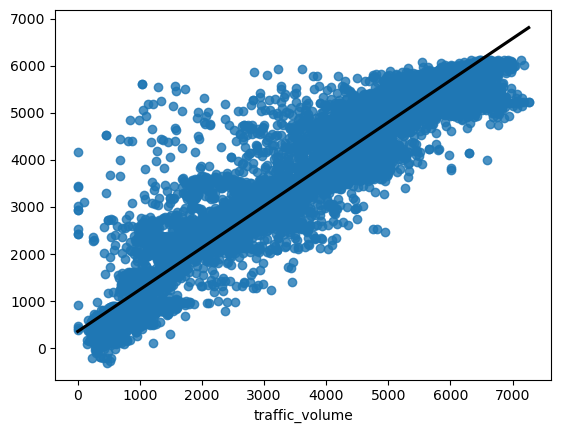

In [55]:
sns.regplot(x=y_test,y=boost_pred,line_kws={"color":"black"})

*добавь комментарии с описанием кода хотя бы для одной первой модели*

## 👾LGBMRegressor 

In [103]:
import lightgbm as lgb
lgbm1 = lgb.LGBMRegressor()

In [104]:
lgbm1.fit(X_train, y_train)
lgbm_pred1 = lgbm1.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 44
[LightGBM] [Info] Start training from score 3267.468849


In [58]:
print('R2 Score', r2_score(y_test, lgbm_pred))
dct['LightGBM'] = r2_score(y_test, lgbm_pred)

R2 Score 0.970370882607358


<Axes: xlabel='traffic_volume'>

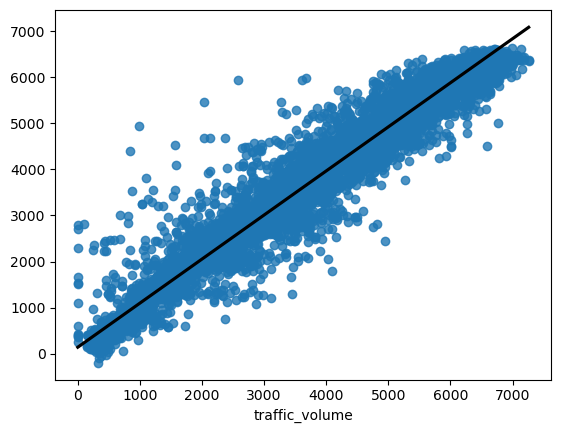

In [59]:
sns.regplot(x=y_test,y=lgbm_pred,line_kws={"color":"black"})

## 👾DecisionTreeRegressor

In [60]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
tree_pred = decision_tree_regressor.predict(X_test)

In [61]:
print('R2 Score', r2_score(y_test, tree_pred))
dct['DecisionTree'] = r2_score(y_test, tree_pred)

R2 Score 0.937143993782532


<Axes: xlabel='traffic_volume'>

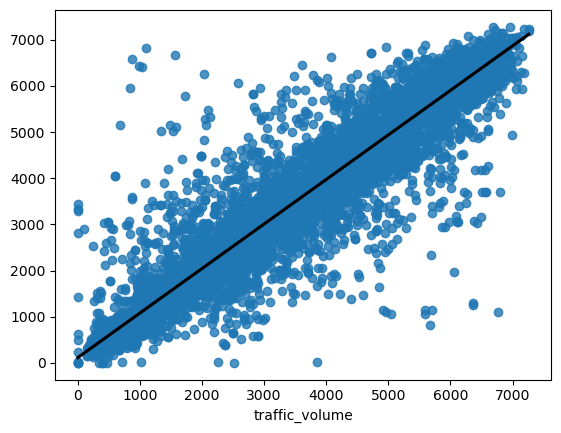

In [62]:
sns.regplot(x=y_test,y=tree_pred,line_kws={"color":"black"})

## 👾CatBoostRegressor

In [63]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=100)
catboost.fit(X_train, y_train)
catpred = catboost.predict(X_test)

0:	learn: 1812.7035227	total: 152ms	remaining: 1m 16s
100:	learn: 450.9391449	total: 505ms	remaining: 1.99s
200:	learn: 402.6443265	total: 839ms	remaining: 1.25s
300:	learn: 375.4152857	total: 1.17s	remaining: 775ms
400:	learn: 357.2933059	total: 1.5s	remaining: 370ms
499:	learn: 344.9229968	total: 1.82s	remaining: 0us


In [64]:
print('R2 Score', r2_score(y_test, catpred))
dct['CatBoost'] = r2_score(y_test, catpred)

R2 Score 0.9675675220936479


<Axes: xlabel='traffic_volume'>

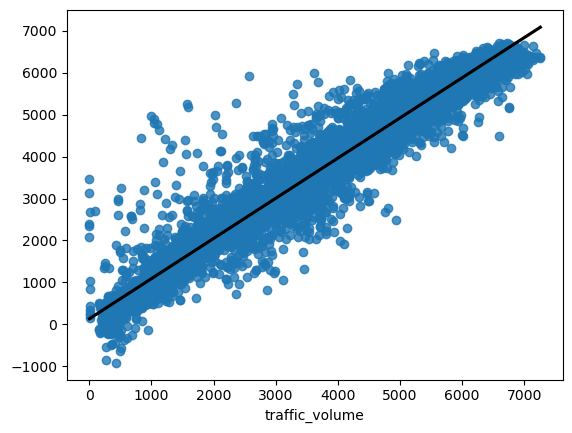

In [65]:
sns.regplot(x=y_test,y=catpred,line_kws={"color":"black"})

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_dummies.drop(['cluster'], axis=1)
y = df_dummies['cluster']

In [96]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

In [98]:
# making prediction
knn.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [99]:
knn_pred_test = knn.predict(X)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0., 0., 0., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3.])

array([ 381,  812, 2319, 4131, 5553, 1200, 2872, 2856,  958, 6466, 5702,
       1212,  630,  831, 4411, 5416, 5119,  648, 5784,  480], dtype=int64)

In [92]:
df_dummies

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,day_of_week,hour,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,cluster
0,288.28,0.0,0.0,40,5545,2012,10,2,1,9,...,0,0,0,0,0,0,0,0,0,4.0
1,289.36,0.0,0.0,75,4516,2012,10,2,1,10,...,0,0,0,0,0,0,0,0,0,0.0
2,289.58,0.0,0.0,90,4767,2012,10,2,1,11,...,0,0,0,0,0,0,0,0,0,0.0
3,290.13,0.0,0.0,90,5026,2012,10,2,1,12,...,0,0,0,0,0,0,0,0,0,0.0
4,291.14,0.0,0.0,75,4918,2012,10,2,1,13,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48172,282.18,0.0,0.0,90,4049,2018,9,30,6,11,...,0,0,0,0,0,0,0,0,0,0.0
48173,282.69,0.0,0.0,75,4429,2018,9,30,6,12,...,0,0,0,0,0,0,0,0,0,0.0
48174,283.03,0.0,0.0,90,4547,2018,9,30,6,13,...,0,0,0,0,0,0,0,0,0,0.0
48175,283.48,0.0,0.0,90,4380,2018,9,30,6,14,...,0,0,0,0,0,0,0,0,0,0.0


In [101]:
# performance measurement
y_train_predict = knn.predict(X)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))


ValueError: Found input variables with inconsistent numbers of samples: [33723, 48167]

## 👀Визуальное сравнение

[Text(0.5, 0, 'Models'),
 Text(0, 0.5, 'r2_score'),
 Text(0.5, 1.0, 'r2-score of ML Models')]

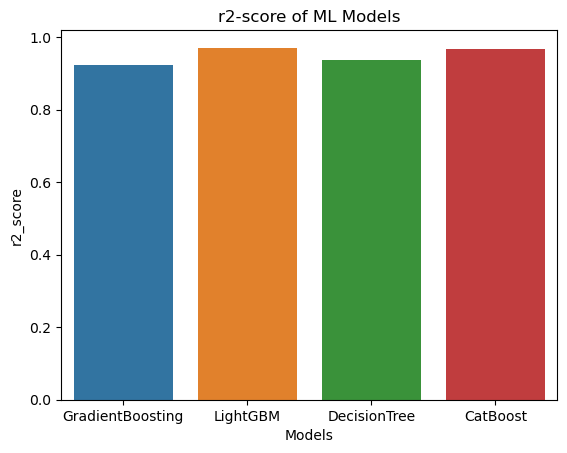

In [71]:
df3 = pd.DataFrame(dct.items())
ax = sns.barplot(x=0, y=1, data=df3)
ax.set(xlabel = 'Models', ylabel='r2_score', title='r2-score of ML Models')

*отлично! не забудь вывод (какая модель оказалась самой точной)*

## Настройка гиперпараметров

In [72]:
import lightgbm as lgb
from sklearn.metrics import r2_score
import optuna

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000), 
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 0.1),  
        'max_depth': trial.suggest_int('max_depth', 3, 15), 
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.5, 1.0),
        'random_state': trial.suggest_int('random_state', 0, 100)
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    return r2_score(y_test, predictions)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters: ", study.best_params)

best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params)

best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R^2 score with best hyperparameters: {r2}")

[I 2025-02-05 18:53:30,389] A new study created in memory with name: no-name-5a1137fc-f84a-43e1-9ef0-a0454ab13683


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:31,532] Trial 0 finished with value: 0.9745583588882049 and parameters: {'n_estimators': 1152, 'learning_rate': 0.02676736038775742, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 6, 'subsample': 0.5903720493268723, 'max_features': 0.6877849906394485, 'random_state': 76}. Best is trial 0 with value: 0.9745583588882049.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:33,234] Trial 1 finished with value: 0.9797207606192705 and parameters: {'n_estimators': 1942, 'learning_rate': 0.06031868440054056, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 9, 'subsample': 0.6903492343514369, 'max_features': 0.9932543196839099, 'random_state': 69}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 70
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:33,786] Trial 2 finished with value: 0.7734828822028895 and parameters: {'n_estimators': 360, 'learning_rate': 0.002484645508585593, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 1, 'subsample': 0.5491193757601474, 'max_features': 0.7799424485222053, 'random_state': 93}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:53:35,037] Trial 3 finished with value: 0.7093634074405446 and parameters: {'n_estimators': 1551, 'learning_rate': 0.0005145986001738707, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 6, 'subsample': 0.5186501250922778, 'max_features': 0.7623847101913908, 'random_state': 87}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wise=true` t

[I 2025-02-05 18:53:37,477] Trial 4 finished with value: 0.1197733744676539 and parameters: {'n_estimators': 1794, 'learning_rate': 3.883137430141084e-05, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 14, 'subsample': 0.7685565516321624, 'max_features': 0.8790372887976681, 'random_state': 47}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:53:38,245] Trial 5 finished with value: 0.016833540269963643 and parameters: {'n_estimators': 540, 'learning_rate': 1.7220201253401423e-05, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 16, 'subsample': 0.6228120028653683, 'max_features': 0.7607111780023228, 'random_state': 67}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to 

[I 2025-02-05 18:53:38,619] Trial 6 finished with value: 0.1315869248128272 and parameters: {'n_estimators': 580, 'learning_rate': 0.00014928464476682496, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5, 'subsample': 0.8575341809231145, 'max_features': 0.9511938878100242, 'random_state': 27}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 47
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:53:40,896] Trial 7 finished with value: 0.49014799238684903 and parameters: {'n_estimators': 1692, 'learning_rate': 0.00022353262666922048, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 11, 'subsample': 0.930509843905436, 'max_features': 0.9080712214401288, 'random_state': 13}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:53:42,284] Trial 8 finished with value: 0.20009051827817903 and parameters: {'n_estimators': 1011, 'learning_rate': 0.00012104466157471923, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 15, 'subsample': 0.721534649467201, 'max_features': 0.9833323153892091, 'random_state': 46}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:53:42,593] Trial 9 finished with value: 0.9586081559273568 and parameters: {'n_estimators': 209, 'learning_rate': 0.0257967077540945, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 13, 'subsample': 0.8580802241730933, 'max_features': 0.6862239845402325, 'random_state': 49}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=19. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=19. Current value: min_data_in_leaf=19
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:53:44,901] Trial 10 finished with value: 0.9598296159827173 and parameters: {'n_estimators': 1996, 'learning_rate': 0.0037626582785612625, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 19, 'subsample': 0.689469166803821, 'max_features': 0.5244338407086604, 'random_state': 66}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:46,055] Trial 11 finished with value: 0.978779119265671 and parameters: {'n_estimators': 1248, 'learning_rate': 0.09806977088733253, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 7, 'subsample': 0.6236300893890301, 'max_features': 0.6262885874132538, 'random_state': 74}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:47,248] Trial 12 finished with value: 0.9708305593318244 and parameters: {'n_estimators': 1285, 'learning_rate': 0.0526247801407423, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 9, 'subsample': 0.6453824283894924, 'max_features': 0.5601279063497459, 'random_state': 74}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:48,084] Trial 13 finished with value: 0.9768832622737832 and parameters: {'n_estimators': 862, 'learning_rate': 0.08227684820885474, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 9, 'subsample': 0.7803621245062413, 'max_features': 0.5949421470031425, 'random_state': 60}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 69
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:49,700] Trial 14 finished with value: 0.9701951215570138 and parameters: {'n_estimators': 1368, 'learning_rate': 0.008849426391487865, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2, 'subsample': 0.6761681522817977, 'max_features': 0.662360279168631, 'random_state': 97}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:53:50,815] Trial 15 finished with value: 0.9701264427028415 and parameters: {'n_estimators': 838, 'learning_rate': 0.011138485699076169, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4, 'subsample': 0.58599430784484, 'max_features': 0.823255662539209, 'random_state': 37}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:53:52,576] Trial 16 finished with value: 0.9783505002313203 and parameters: {'n_estimators': 1994, 'learning_rate': 0.0923987870628839, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 8, 'subsample': 0.8095451078478091, 'max_features': 0.6351995350848487, 'random_state': 79}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 47
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:53:54,589] Trial 17 finished with value: 0.9326299271113867 and parameters: {'n_estimators': 1495, 'learning_rate': 0.0015219582977521108, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 11, 'subsample': 0.712770387571347, 'max_features': 0.5061264565815136, 'random_state': 1}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to 

[I 2025-02-05 18:53:56,813] Trial 18 finished with value: 0.9728483565926284 and parameters: {'n_estimators': 1748, 'learning_rate': 0.007853932659384666, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 8, 'subsample': 0.6480630506864793, 'max_features': 0.8317237467146562, 'random_state': 57}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 66
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:53:57,737] Trial 19 finished with value: 0.9589122153549453 and parameters: {'n_estimators': 1152, 'learning_rate': 0.025486115131177982, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 0.9808745602829032, 'max_features': 0.6068017356875706, 'random_state': 83}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 46
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:53:58,793] Trial 20 finished with value: 0.6269820487631055 and parameters: {'n_estimators': 744, 'learning_rate': 0.000760702433691942, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 12, 'subsample': 0.5029517873676078, 'max_features': 0.690952100469437, 'random_state': 34}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to 

[I 2025-02-05 18:54:00,619] Trial 21 finished with value: 0.9781758639434011 and parameters: {'n_estimators': 1998, 'learning_rate': 0.08447441495107141, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 8, 'subsample': 0.828315139402743, 'max_features': 0.6307454734891897, 'random_state': 78}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:02,331] Trial 22 finished with value: 0.9748310463949499 and parameters: {'n_estimators': 1843, 'learning_rate': 0.038757137551613224, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 7, 'subsample': 0.7597166008673146, 'max_features': 0.7092332597171785, 'random_state': 68}. Best is trial 1 with value: 0.9797207606192705.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 48
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:54:03,599] Trial 23 finished with value: 0.9806903369131891 and parameters: {'n_estimators': 1434, 'learning_rate': 0.08286946485822672, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 10, 'subsample': 0.8092929433426058, 'max_features': 0.5518396742476788, 'random_state': 87}. Best is trial 23 with value: 0.9806903369131891.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:54:05,264] Trial 24 finished with value: 0.9719862727924773 and parameters: {'n_estimators': 1561, 'learning_rate': 0.012359811678977192, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 10, 'subsample': 0.9189321170408666, 'max_features': 0.549161920281618, 'random_state': 90}. Best is trial 23 with value: 0.9806903369131891.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 46
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:54:06,701] Trial 25 finished with value: 0.9705458859432156 and parameters: {'n_estimators': 1335, 'learning_rate': 0.016554655886354956, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 12, 'subsample': 0.606185887732591, 'max_features': 0.5752731310923523, 'random_state': 59}. Best is trial 23 with value: 0.9806903369131891.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 48
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:54:07,789] Trial 26 finished with value: 0.9794359935666584 and parameters: {'n_estimators': 1076, 'learning_rate': 0.04351817324390304, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 10, 'subsample': 0.7282786207040155, 'max_features': 0.7248979128689298, 'random_state': 98}. Best is trial 23 with value: 0.9806903369131891.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:54:09,130] Trial 27 finished with value: 0.962771988662665 and parameters: {'n_estimators': 998, 'learning_rate': 0.00530583225300677, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 17, 'subsample': 0.7191091858292606, 'max_features': 0.8190279163809977, 'random_state': 99}. Best is trial 23 with value: 0.9806903369131891.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:54:10,551] Trial 28 finished with value: 0.9808626285984136 and parameters: {'n_estimators': 1472, 'learning_rate': 0.04597690057963737, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 10, 'subsample': 0.8049315511034895, 'max_features': 0.9994775944105291, 'random_state': 100}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:54:12,186] Trial 29 finished with value: 0.977412691561806 and parameters: {'n_estimators': 1639, 'learning_rate': 0.021874964010432672, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 13, 'subsample': 0.8904080427039445, 'max_features': 0.9977863292279366, 'random_state': 89}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 55
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:13,531] Trial 30 finished with value: 0.9803280920857996 and parameters: {'n_estimators': 1404, 'learning_rate': 0.044820570117940293, 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 5, 'subsample': 0.8108004737094853, 'max_features': 0.9298510919040677, 'random_state': 84}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:14,900] Trial 31 finished with value: 0.9808538557352443 and parameters: {'n_estimators': 1435, 'learning_rate': 0.04438019336815875, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 5, 'subsample': 0.8057348021371518, 'max_features': 0.9452241434594744, 'random_state': 84}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:16,370] Trial 32 finished with value: 0.9785445649060694 and parameters: {'n_estimators': 1455, 'learning_rate': 0.027325541612891822, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 5, 'subsample': 0.8044353459227821, 'max_features': 0.9419789274509585, 'random_state': 84}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:17,732] Trial 33 finished with value: 0.9804211413107108 and parameters: {'n_estimators': 1398, 'learning_rate': 0.04557708844602869, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 2, 'subsample': 0.857919419080918, 'max_features': 0.8881143117292355, 'random_state': 92}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:19,346] Trial 34 finished with value: 0.9644562761749991 and parameters: {'n_estimators': 1178, 'learning_rate': 0.004912213527325617, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 1, 'subsample': 0.8591341796984711, 'max_features': 0.8774604680416754, 'random_state': 93}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001506 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:21,124] Trial 35 finished with value: 0.9766222308097238 and parameters: {'n_estimators': 1602, 'learning_rate': 0.015975107924383322, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 3, 'subsample': 0.9055326384675774, 'max_features': 0.9715775589281674, 'random_state': 100}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 69
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:23,174] Trial 36 finished with value: 0.9515868561480005 and parameters: {'n_estimators': 1494, 'learning_rate': 0.002199056971189419, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 2, 'subsample': 0.8389986954611064, 'max_features': 0.8672945843709128, 'random_state': 94}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:24,399] Trial 37 finished with value: 0.9802858747123699 and parameters: {'n_estimators': 1228, 'learning_rate': 0.054278778159957464, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 1, 'subsample': 0.9612798783467107, 'max_features': 0.912742707434494, 'random_state': 89}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:26,118] Trial 38 finished with value: 0.9802876636272281 and parameters: {'n_estimators': 1795, 'learning_rate': 0.030904792839485204, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 6, 'subsample': 0.7833685661426079, 'max_features': 0.9561316510850764, 'random_state': 80}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 60
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:27,612] Trial 39 finished with value: 0.9805061490888333 and parameters: {'n_estimators': 1678, 'learning_rate': 0.05436320953030227, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 4, 'subsample': 0.8732652825797814, 'max_features': 0.8971218727563033, 'random_state': 74}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:30,103] Trial 40 finished with value: 0.03372562446387628 and parameters: {'n_estimators': 1697, 'learning_rate': 1.1029175373641169e-05, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 4, 'subsample': 0.8876684409860236, 'max_features': 0.9696753318857106, 'random_state': 74}. Best is trial 28 with value: 0.9808626285984136.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:54:31,854] Trial 41 finished with value: 0.9820125207698884 and parameters: {'n_estimators': 1861, 'learning_rate': 0.05910752467626591, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 4, 'subsample': 0.8690979158731565, 'max_features': 0.8980695629568972, 'random_state': 93}. Best is trial 41 with value: 0.9820125207698884.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:33,680] Trial 42 finished with value: 0.9826459815864093 and parameters: {'n_estimators': 1850, 'learning_rate': 0.0664767351674173, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 7, 'subsample': 0.9394999239236203, 'max_features': 0.7912425666180511, 'random_state': 86}. Best is trial 42 with value: 0.9826459815864093.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:35,574] Trial 43 finished with value: 0.978076704266099 and parameters: {'n_estimators': 1901, 'learning_rate': 0.01990951475139063, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 8, 'subsample': 0.9407801548706555, 'max_features': 0.8402858399554357, 'random_state': 85}. Best is trial 42 with value: 0.9826459815864093.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:37,313] Trial 44 finished with value: 0.9824286006387072 and parameters: {'n_estimators': 1821, 'learning_rate': 0.0635694736567665, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 6, 'subsample': 0.8223702322154439, 'max_features': 0.7933415369460226, 'random_state': 93}. Best is trial 42 with value: 0.9826459815864093.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:39,968] Trial 45 finished with value: 0.15819016125918894 and parameters: {'n_estimators': 1873, 'learning_rate': 5.0284225087461536e-05, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 6, 'subsample': 0.83299872815683, 'max_features': 0.7752872140301682, 'random_state': 95}. Best is trial 42 with value: 0.9826459815864093.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:41,639] Trial 46 finished with value: 0.9805701648622265 and parameters: {'n_estimators': 1756, 'learning_rate': 0.03402002461736074, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 7, 'subsample': 0.9979082905488148, 'max_features': 0.7914885599436717, 'random_state': 100}. Best is trial 42 with value: 0.9826459815864093.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:43,460] Trial 47 finished with value: 0.9826749677521438 and parameters: {'n_estimators': 1906, 'learning_rate': 0.06687117822939381, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 6, 'subsample': 0.7435067097806881, 'max_features': 0.7409019780607727, 'random_state': 94}. Best is trial 47 with value: 0.9826749677521438.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:45,195] Trial 48 finished with value: 0.982597053383376 and parameters: {'n_estimators': 1917, 'learning_rate': 0.06931906086929844, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 9, 'subsample': 0.9497016993124793, 'max_features': 0.7487235627443278, 'random_state': 94}. Best is trial 47 with value: 0.9826749677521438.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:46,957] Trial 49 finished with value: 0.9823764905709426 and parameters: {'n_estimators': 1899, 'learning_rate': 0.06829373073611521, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 7, 'subsample': 0.9378207727819571, 'max_features': 0.7979619871895828, 'random_state': 94}. Best is trial 47 with value: 0.9826749677521438.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:49,523] Trial 50 finished with value: 0.6795075418731755 and parameters: {'n_estimators': 1897, 'learning_rate': 0.0003487819399450368, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 9, 'subsample': 0.9558252152120049, 'max_features': 0.7347285740455788, 'random_state': 64}. Best is trial 47 with value: 0.9826749677521438.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:51,125] Trial 51 finished with value: 0.9824672050745148 and parameters: {'n_estimators': 1797, 'learning_rate': 0.0668511222686987, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 7, 'subsample': 0.9218045708549064, 'max_features': 0.8054043275259868, 'random_state': 93}. Best is trial 47 with value: 0.9826749677521438.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:52,719] Trial 52 finished with value: 0.9821453248598596 and parameters: {'n_estimators': 1814, 'learning_rate': 0.06897061473986572, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 7, 'subsample': 0.933904184171134, 'max_features': 0.7990422117436955, 'random_state': 95}. Best is trial 47 with value: 0.9826749677521438.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:54,354] Trial 53 finished with value: 0.9830505789634735 and parameters: {'n_estimators': 1925, 'learning_rate': 0.0988011003416323, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 6, 'subsample': 0.965853944091646, 'max_features': 0.7503928228055754, 'random_state': 90}. Best is trial 53 with value: 0.9830505789634735.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:56,033] Trial 54 finished with value: 0.9831126440553244 and parameters: {'n_estimators': 1947, 'learning_rate': 0.09609477853919116, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 6, 'subsample': 0.9719188552031364, 'max_features': 0.7542133658106128, 'random_state': 89}. Best is trial 54 with value: 0.9831126440553244.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:57,727] Trial 55 finished with value: 0.9827737106848868 and parameters: {'n_estimators': 1996, 'learning_rate': 0.0931206951274921, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 9, 'subsample': 0.9794179626151535, 'max_features': 0.7507653049754788, 'random_state': 71}. Best is trial 54 with value: 0.9831126440553244.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:54:59,374] Trial 56 finished with value: 0.9831957719469719 and parameters: {'n_estimators': 1930, 'learning_rate': 0.09939759499568293, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 8, 'subsample': 0.999172524162333, 'max_features': 0.7559685446588013, 'random_state': 71}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:01,056] Trial 57 finished with value: 0.9831294573181877 and parameters: {'n_estimators': 1991, 'learning_rate': 0.09641248921175259, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.9779895948839195, 'max_features': 0.7605204884834763, 'random_state': 79}. Best is trial 56 with value: 0.9831957719469719.
[I 2025-02-05 18:55:01,234] Trial 58 finished with value: 0.9652263662317604 and parameters: {'n_estimators': 62, 'learning_rate': 0.09850017359798965, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 6, 'subsample': 0.9751480909169152, 'max_features': 0.7608316598585257, 'random_state': 54}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:03,032] Trial 59 finished with value: 0.9793124948128041 and parameters: {'n_estimators': 1967, 'learning_rate': 0.030773274249004008, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 8, 'subsample': 0.979342877616939, 'max_features': 0.6709083188756952, 'random_state': 70}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 47
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:55:04,531] Trial 60 finished with value: 0.9823760956965203 and parameters: {'n_estimators': 1716, 'learning_rate': 0.09114268156926807, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 11, 'subsample': 0.9963821716154616, 'max_features': 0.7096239000322554, 'random_state': 80}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:06,207] Trial 61 finished with value: 0.9829849601762921 and parameters: {'n_estimators': 1949, 'learning_rate': 0.09493529036981498, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.9667842439937816, 'max_features': 0.7434533256407682, 'random_state': 70}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:07,899] Trial 62 finished with value: 0.9830410983636622 and parameters: {'n_estimators': 2000, 'learning_rate': 0.09852996258622736, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.9679608007401177, 'max_features': 0.743952096397194, 'random_state': 65}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:09,634] Trial 63 finished with value: 0.9827506171339574 and parameters: {'n_estimators': 1977, 'learning_rate': 0.0900823709571468, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 9, 'subsample': 0.9683358291436437, 'max_features': 0.7672482187336764, 'random_state': 63}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:11,340] Trial 64 finished with value: 0.9828953129334406 and parameters: {'n_estimators': 1999, 'learning_rate': 0.09990045009348653, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 9, 'subsample': 0.9868368006168471, 'max_features': 0.7144697613334643, 'random_state': 70}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:13,118] Trial 65 finished with value: 0.980051056587785 and parameters: {'n_estimators': 1942, 'learning_rate': 0.035014620360822576, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 8, 'subsample': 0.9997391989440845, 'max_features': 0.7196732382753618, 'random_state': 52}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 47
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:55:14,822] Trial 66 finished with value: 0.9767911735504382 and parameters: {'n_estimators': 1724, 'learning_rate': 0.018136231911065746, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 11, 'subsample': 0.91262100727226, 'max_features': 0.6917893283789333, 'random_state': 66}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:16,723] Trial 67 finished with value: 0.975479770212122 and parameters: {'n_estimators': 1765, 'learning_rate': 0.012595120661619802, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 8, 'subsample': 0.9607227249407768, 'max_features': 0.7074959967461871, 'random_state': 45}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 48
[LightGBM] [Info] Start training from score 32

[I 2025-02-05 18:55:17,296] Trial 68 finished with value: 0.9698237395996004 and parameters: {'n_estimators': 409, 'learning_rate': 0.0235413520900241, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10, 'subsample': 0.9885439724965475, 'max_features': 0.6602957942206382, 'random_state': 77}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true`

[I 2025-02-05 18:55:18,823] Trial 69 finished with value: 0.9791248107546203 and parameters: {'n_estimators': 1620, 'learning_rate': 0.03714823693747436, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 12, 'subsample': 0.901773338035919, 'max_features': 0.7292734206296569, 'random_state': 62}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:20,576] Trial 70 finished with value: 0.9816827425677881 and parameters: {'n_estimators': 1932, 'learning_rate': 0.04982615912363592, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 9, 'subsample': 0.960564401045732, 'max_features': 0.7718167672005032, 'random_state': 71}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=9. Current value: min_data_in_leaf=9
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 49
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:22,317] Trial 71 finished with value: 0.9827891941580627 and parameters: {'n_estimators': 1991, 'learning_rate': 0.08236308236565955, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 9, 'subsample': 0.9744427913042566, 'max_features': 0.7537757096561478, 'random_state': 71}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:24,031] Trial 72 finished with value: 0.9831775751085149 and parameters: {'n_estimators': 1991, 'learning_rate': 0.09691735497398711, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 8, 'subsample': 0.9722082508581674, 'max_features': 0.7514507565844162, 'random_state': 81}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:25,752] Trial 73 finished with value: 0.9810929155803859 and parameters: {'n_estimators': 1941, 'learning_rate': 0.0526502675410852, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 8, 'subsample': 0.9491496076758079, 'max_features': 0.69712150695461, 'random_state': 81}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=7. Current value: min_data_in_leaf=7
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 51
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:27,438] Trial 74 finished with value: 0.9811747400449355 and parameters: {'n_estimators': 1844, 'learning_rate': 0.03929588947005523, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 7, 'subsample': 0.9277135555885935, 'max_features': 0.67034873398144, 'random_state': 76}. Best is trial 56 with value: 0.9831957719469719.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 55
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:29,092] Trial 75 finished with value: 0.9835646388915182 and parameters: {'n_estimators': 1941, 'learning_rate': 0.09757479426250486, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 5, 'subsample': 0.9870619840272312, 'max_features': 0.7408071768520201, 'random_state': 57}. Best is trial 75 with value: 0.9835646388915182.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 55
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:30,027] Trial 76 finished with value: 0.10426645794574574 and parameters: {'n_estimators': 631, 'learning_rate': 9.521919949094903e-05, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 5, 'subsample': 0.971321500242056, 'max_features': 0.8181281586115542, 'random_state': 59}. Best is trial 75 with value: 0.9835646388915182.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:55:31,425] Trial 77 finished with value: 0.9825375607759391 and parameters: {'n_estimators': 1560, 'learning_rate': 0.07967807396874689, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 5, 'subsample': 0.5418497918156099, 'max_features': 0.7805490893415555, 'random_state': 56}. Best is trial 75 with value: 0.9835646388915182.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to re

[I 2025-02-05 18:55:33,192] Trial 78 finished with value: 0.9814316759372863 and parameters: {'n_estimators': 1780, 'learning_rate': 0.049409340950924155, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 3, 'subsample': 0.987111403193446, 'max_features': 0.7336790339177014, 'random_state': 67}. Best is trial 75 with value: 0.9835646388915182.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 52
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:34,891] Trial 79 finished with value: 0.9793143722023875 and parameters: {'n_estimators': 1667, 'learning_rate': 0.027126156184488912, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 6, 'subsample': 0.9471704945692098, 'max_features': 0.7426688141109342, 'random_state': 74}. Best is trial 75 with value: 0.9835646388915182.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=5. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 55
[LightGBM] [Info] Start training from score 3267.4

[I 2025-02-05 18:55:36,600] Trial 80 finished with value: 0.9824953549114824 and parameters: {'n_estimators': 1838, 'learning_rate': 0.07613664857260152, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 5, 'subsample': 0.9626736528552111, 'max_features': 0.7609692763591013, 'random_state': 42}. Best is trial 75 with value: 0.9835646388915182.


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 44
[LightGBM] [Info] Start training from score 32

[W 2025-02-05 18:55:38,133] Trial 81 failed with parameters: {'n_estimators': 1951, 'learning_rate': 0.09784422477460464, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 20, 'subsample': 0.9875156201985595, 'max_features': 0.7181465915104353, 'random_state': 88} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "D:\Games\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_15484\4193723016.py", line 18, in objective
    model.fit(X_train, y_train)
  File "D:\Games\Lib\site-packages\lightgbm\sklearn.py", line 1189, in fit
    super().fit(
  File "D:\Games\Lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "D:\Games\Lib\site-packages\lightgbm\engine.py", line 335, in train
    booster.model_from_string(booster.model_to_string()).f

KeyboardInterrupt: 

*добавь комментарии и расскажи почему ты настраиваешь гиперпараметры*

### Обучим модель с подобранными гиперпараметрами

In [78]:
lgbm = lgb.LGBMRegressor(n_estimators = 1556,
                        learning_rate = 0.02511866843538735,
                        max_depth = 13,
                        min_samples_split = 5,
                        min_samples_leaf = 8,
                        subsample = 0.5021373565003406,
                        random_state = 62)

In [79]:
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=8. Current value: min_data_in_leaf=8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 33723, number of used features: 50
[LightGBM] [Info] Start training from score 3267.468849
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is s

In [80]:
print('R2 Score', r2_score(y_test, lgbm_pred))

R2 Score 0.9786917347143427


*класс! ещё бы вывод сюда... мол настроили гиперпараметры и теперь модель ещё точнее*

In [88]:
import joblib

joblib.dump(lgbm, "lgbm.pkl")
joblib.dump(knn, 'knnclassfier.pkl')
joblib.dump(catboost, 'ctreg.pkl')
joblib.dump(boost, 'boost.pkl')

df_dummies.to_csv('cxz.csv')

In [105]:
joblib.dump(lgbm1, "lgbm1.pkl")


['lgbm1.pkl']

In [82]:
df_dummies

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,year,month,day,day_of_week,hour,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,cluster
0,288.28,0.0,0.0,40,5545,2012,10,2,1,9,...,0,0,0,0,0,0,0,0,0,4.0
1,289.36,0.0,0.0,75,4516,2012,10,2,1,10,...,0,0,0,0,0,0,0,0,0,0.0
2,289.58,0.0,0.0,90,4767,2012,10,2,1,11,...,0,0,0,0,0,0,0,0,0,0.0
3,290.13,0.0,0.0,90,5026,2012,10,2,1,12,...,0,0,0,0,0,0,0,0,0,0.0
4,291.14,0.0,0.0,75,4918,2012,10,2,1,13,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,283.45,0.0,0.0,75,3543,2018,9,30,6,19,...,0,0,0,0,0,0,0,0,0,NaN
48183,282.76,0.0,0.0,90,2781,2018,9,30,6,20,...,0,0,0,0,0,0,0,0,0,NaN
48184,282.73,0.0,0.0,90,2159,2018,9,30,6,21,...,0,0,0,0,0,0,0,0,0,NaN
48185,282.09,0.0,0.0,90,1450,2018,9,30,6,22,...,0,0,0,0,0,0,0,0,0,NaN


In [87]:
df_dummies = df_dummies.dropna()
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48167 entries, 0 to 48176
Data columns (total 72 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   temp                                                     48167 non-null  float64
 1   rain_1h                                                  48167 non-null  float64
 2   snow_1h                                                  48167 non-null  float64
 3   clouds_all                                               48167 non-null  int64  
 4   traffic_volume                                           48167 non-null  int64  
 5   year                                                     48167 non-null  int32  
 6   month                                                    48167 non-null  int32  
 7   day                                                      48167 non-null  int32  
 8   day_of_week                    

# 📝Вывод

В ходе анализа и преобработки данных были выявлены пустые значения в признаке holiday, они были успешно преобразованы в значение "None". Были обнаружены дубликаты, они также были удалены после того, как убедились, что это правда дубликаты.

Позже данные в датасете были закодированы для лучшего обучения моделей, и после обучили четыре модели: GradientBoosting, LightGBM, DecisionTree.
Ознакомившись с результатами обучения, выявили, что модель LightGBM обучилась лучше всех.

Позднее были настроены гиперпараметры для этой модели, которые, к сожалению, не принесли должного результата.

*в 4 модуле вы, возможно, будете разрабатывать API, поэтому следует сохранить датасет с кластерами и итоговую модель мо. вот пример сохранения модели:*

`import joblib`
`joblib.dump(<название твоей модели>, "<название файла>.pkl")`

In [102]:
joblib.dump(knn, 'knnclassfier.pkl')


['knnclassfier.pkl']